# **Importing essential libraries**

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import os, shutil
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import load_model

# **Defining the dataset**

In [28]:
train_path = '/content/drive/MyDrive/adult_child/train'
test_path = '/content/drive/MyDrive/adult_child/test'

In [29]:
image_categories = os.listdir('/content/drive/MyDrive/adult_child/train')

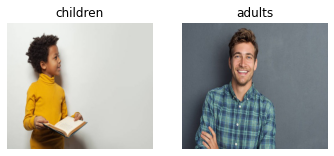

In [30]:
def plot_images(image_categories):
    
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = tf.keras.utils.load_img(first_image_path)
        img_arr = tf.keras.utils.img_to_array(img)/255.0
        
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

plot_images(image_categories)

In [31]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  fill_mode='nearest')

train = train_datagen.flow_from_directory(train_path,
                                         batch_size=32,
                                         target_size=(128,128),
                                         class_mode='binary',
                                         shuffle=True,
                                         interpolation='nearest')

Found 680 images belonging to 2 classes.


In [32]:
test_datagen = ImageDataGenerator(rescale=1/255.)

test = test_datagen.flow_from_directory(test_path,
                                        batch_size=32,
                                        target_size=(128,128),
                                        class_mode='binary',
                                        shuffle=True,
                                        interpolation='nearest')

Found 120 images belonging to 2 classes.


In [33]:
class_map = dict([(v, k) for k, v in train.class_indices.items()])
print(class_map)

{0: 'adults', 1: 'children'}


# **Predictions using different models**

In [34]:
def generate_predictions(test_image_path, actual_label):
    
    test_img = tf.keras.utils.load_img(test_image_path, target_size=(128, 128))
    test_img_arr = tf.keras.utils.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_category = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_category, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

In [35]:
# Using a sequential cnn model
model = load_model('/content/drive/MyDrive/adult_child/children_adult_classifier.h5')
model

In [36]:
loss, acc = model.evaluate(test)
print("Test Loss:",loss)
print("Test Accuracy:",acc)

4/4 [==============================] - 2s 311ms/step - loss: 1.3055 - accuracy: 0.7083
Test Loss: 1.3055071830749512
Test Accuracy: 0.7083333134651184


1/1 [==============================] - 0s 87ms/step


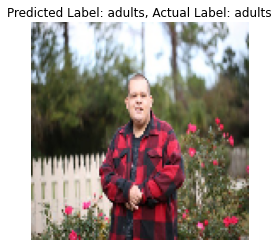

In [37]:
test_image_path = '/content/drive/MyDrive/adult_child/test/adults/0.jpg'

generate_predictions(test_image_path, actual_label='adults')

In [43]:
# Using pre-trained VGG16 model
model0 = load_model('/content/drive/MyDrive/adult_child/model_82.5.h5')
model0

In [40]:
loss, acc = model0.evaluate(test)
print("Test Loss:",loss)
print("Test Accuracy:",acc)

4/4 [==============================] - 21s 5s/step - loss: 0.7740 - accuracy: 0.8250
Test Loss: 0.7739907503128052
Test Accuracy: 0.824999988079071


1/1 [==============================] - 0s 64ms/step


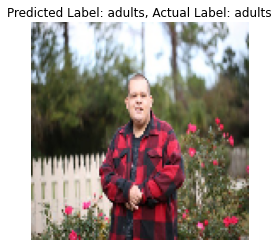

In [44]:
test_image_path = '/content/drive/MyDrive/adult_child/test/adults/0.jpg'

generate_predictions(test_image_path, actual_label='adults')

In [41]:
# Using a pre-trained InceptionV3 model
model1 = load_model('/content/drive/MyDrive/adult_child/model_inc.h5')
model1

In [45]:
train = train_datagen.flow_from_directory(train_path,
                                         batch_size=32,
                                         target_size=(150,150),
                                         class_mode='binary',
                                         shuffle=True,
                                         interpolation='nearest')

test = test_datagen.flow_from_directory(test_path,
                                        batch_size=32,
                                        target_size=(150,150),
                                        class_mode='binary',
                                        shuffle=True,
                                        interpolation='nearest')

loss, acc = model1.evaluate(test)
print("Test Loss:",loss)
print("Test Accuracy:",acc)

Found 680 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
4/4 [==============================] - 14s 3s/step - loss: 1.3270 - acc: 0.6500
Test Loss: 1.3269848823547363
Test Accuracy: 0.6499999761581421


1/1 [==============================] - 0s 31ms/step


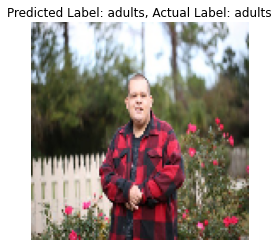

In [46]:
test_image_path = '/content/drive/MyDrive/adult_child/test/adults/0.jpg'

generate_predictions(test_image_path, actual_label='adults')